| <h1> Activity 4.1 </h1> | <h1>Advanced Data Analytics and Machine Learning</h1> |
|--- | --- |

Name: Escalicas, Peter Allen M.

Course and Section: CPE019S3

Date Submitted: 02/22/24

Instructor: Engr. Roman

Date Performed: 2/21/24

Date Submitted: 2/21/24

# **PART 1: Do the following objectives:**

**Part 1: Import the Libraries and Data**

In [ ]:
#code 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import IPython
import seaborn

titanic_test = '/content/titanic_test.csv'
testFrame = pd.read_csv(titanic_test)


titanic_train = '/content/titanic_train.csv'
trainFrame = pd.read_csv(titanic_train)



**Part 2: Plot the Data**

In [ ]:
#code 2
testFrame.describe()

trainFrame.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


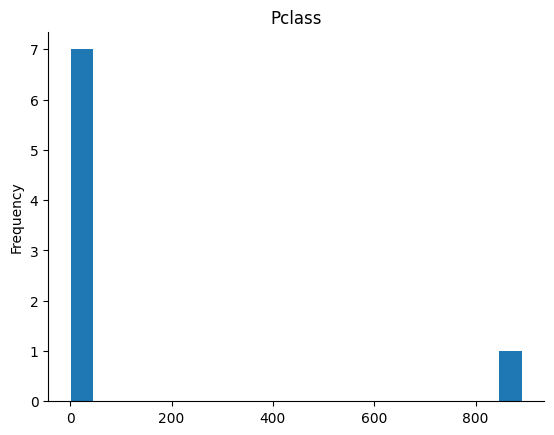

In [ ]:
from matplotlib import pyplot as plt
_df_2['Pclass'].plot(kind='hist', bins=20, title='Pclass')
plt.gca().spines[['top', 'right',]].set_visible(False)

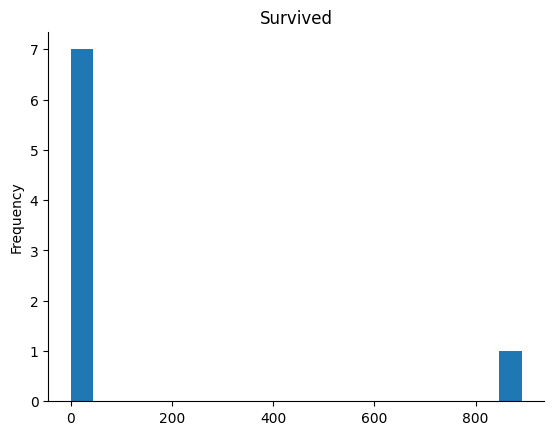

In [ ]:
from matplotlib import pyplot as plt
_df_1['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

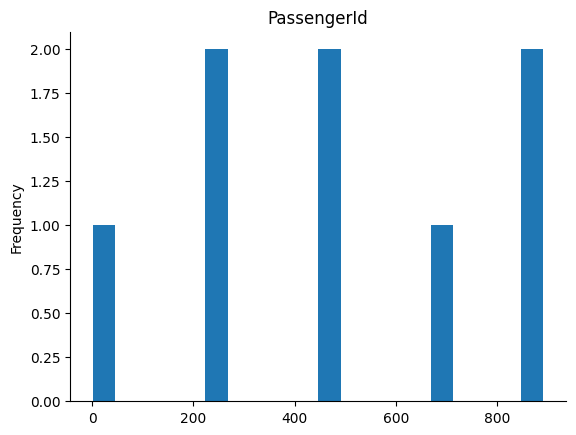

In [ ]:
from matplotlib import pyplot as plt
_df_0['PassengerId'].plot(kind='hist', bins=20, title='PassengerId')
plt.gca().spines[['top', 'right',]].set_visible(False)

# **PART 2: PDF File**

**Part 1: Create a Decision Tree Classifier**

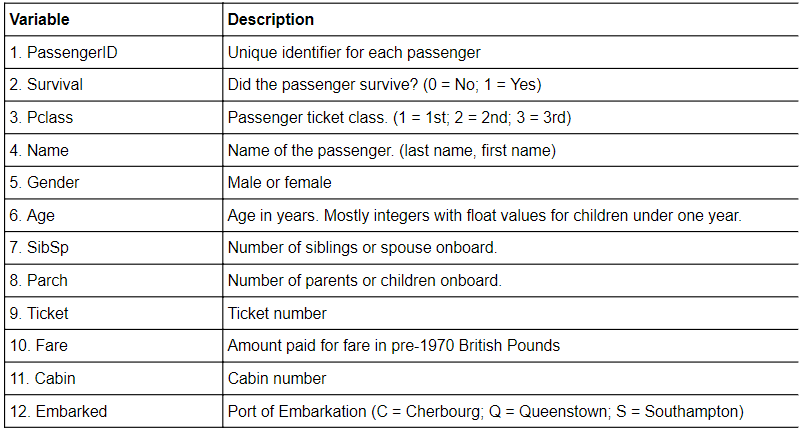

With the data above, what kinds of questions can we ask about the factors that contributed to passengers
surviving or perishing in the Titanic disaster?

**Answer: Does the survival rate will increase if the Passenger class were to be in the 1st class? Does the age have a significant factor on contributing to the survival rate of the passengers?**

**Step 1: Create the datafram**e

a) Import pandas and the csv file
First, import pandas and create a dataframe from the Titanic training data set, which is stored in the titanic-
train.csv file. Use the pd.read_csv() method.

In [ ]:
#Code cell 1
#import pandas
import pandas as pd
#create a pandas dataframe called "training" from the titanic-train.csv file
training = pd.read_csv('/content/titanic_train.csv')


b) Verify the import and take a look at the data.

In [119]:
#Code cell 2
print(training.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB
None


Are there missing values in the data set?

**Answer: None**

---



In [ ]:
#code cell 3
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Step 2: Prepare the Data for the Decision Tree Model.**

a) Replace string data with numeric labels
We will use scikit-learn to create the decision trees. The decision tree model we will be using can only handle
numeric data. The values for the Gender variable must be transformed into numeric representations. 0 will be
used to represent "male" and 1 will represent "female."
In this code, a lambda expression is used with the apply() dataframe method. This lambda expression
represents a function that uses a conditional statement to replace the text values in the columns with the
appropriate numeric value. The lambda statement can be interpreted as "if the parameter toLabel equals 'male',
return 0, if the value is something else, return 1." The apply() method will execute this function on the values in
every row of the "Gender" column of the dataframe.

In [ ]:
#code cell 4
training["Sex"] = training["Sex"].apply(lambda toLabel: 0 if toLabel =='male' else 1)



---



b) Verify that the Gender variable has been changed.
The output should show values of 0 or 1 for the Gender variable in the dataset.

In [ ]:
#code cell 5
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


c) Address Missing Values in the Dataset
The output of the info() method above indicated that about 180 observations are missing the age value. The age
value is important to our analysis. We must address these missing values in some way. While not ideal, we can
replace these missing age values with the mean of the ages for the entire dataset.
This is done by using the fillna() method on the "Age" column in the dataset. The fillna() method will
change the original dataframe by using the inplace = True argument.

In [ ]:
#code cell 6
training["Age"].fillna(training["Age"].mean(), inplace=True)
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB




---



d) Verify that the values have been replaced.

In [ ]:
#code cell 7
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


What is the value that was used to replace the missing ages?

**Answer: 48**

---



**Step 3: Train and Score the Decision Tree Model.**

a) Create an array object with the variable that will be the target for the model

In [ ]:
#code cell 8
#create the array for the target values
y_target = training["Survived"].values

b) Create an array of the values that will be the input for the model.

In [ ]:
#code cell 9
columns = ["Fare", "Pclass", "Sex", "Age", "SibSp"]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

c) Create the learned model.

In [ ]:
#code cell 10
#import the tree module from the sklearn library
from sklearn import tree
#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
#train the model using the fit() method of the decision tree object.
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)

d) Evaluate the model

In [ ]:
#code cell 11
clf_train.score(X_input,y_target)

0.8226711560044894



---



**Step 6: Visualize the Tree**

a) Create the intermediate file output

In [ ]:
#code cell 12
from six import StringIO
with open('/content/titanic.dot', 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns)

b) Install Graphviz

**- Done**

c) Convert the intermediate file to a graphic


In [ ]:
!apt -qqq install graphviz
from IPython.display import Image

In [ ]:
#code cell 13
#run the Graphviz dot command to convert the .dot file to .png
!dot -Tpng /content/titanic.dot -o /content/titanic.png

d) Display the image

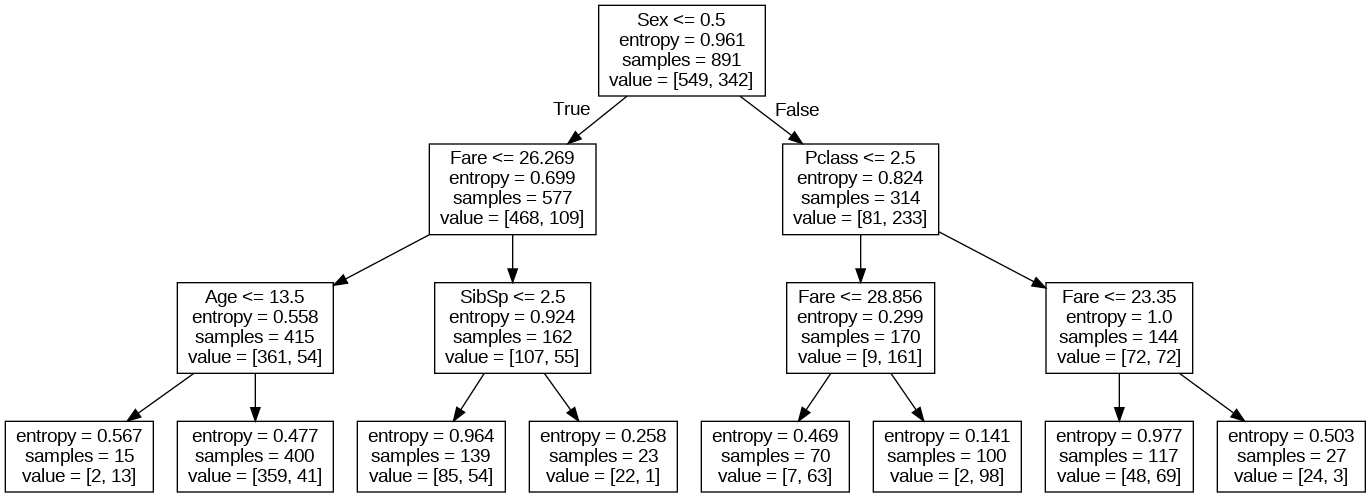

In [ ]:
#code cell 14
#import the Image module from the Ipython.display libary
from IPython.display import Image
#display the decison tree graphic
Image('/content/titanic.png')


e) Interpret the tree

What describes the group that had the most deaths by number? Which group had the most survivors?

**Answer:**

The group that had experienced the **most death are the Male group** with the Fare of 26.269. And lastly the group that **Survived the most are the Female Group**

---



# **Part 2: Apply the Decision Tree Model**

*Step 1: Import and Prepare the Data*





In [ ]:
#code cell 15
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

#import the file into the 'testing' dataframe.
testing = pd.read_csv('/content/titanic_test.csv')

How many records in the Data set?

In [ ]:
#records in the Data Set

records = testing.shape[0]

print("There are", testing, "records in the Data Set!")

There are      PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5     



---


Which important variables(s) are missing values and how many are missing?




In [ ]:
# Check for missing values and count them for each column
m_values = testing.isna().sum()

# Filter for columns with missing values
columns_with_m_values = m_values[m_values > 0]

# Output
print(columns_with_m_values)


Cabin    327
dtype: int64


b) Use a lambda expression to replace the "male" and "female" values with 0 for male and 1 for female..

In [ ]:
testing["Sex"] = testing["Sex"].apply(lambda toLabel: 0 if toLabel =='male' else 1)

c) Replace the missing age values with the mean of the ages.


In [ ]:
#code cell 17
#Use the fillna method of the testing dataframe column "Age"
#to replace missing values with the mean of the age values.
testing["Age"].fillna(testing["Age"].mean(), inplace=True)
testing["Fare"].fillna(testing["Fare"].mean(), inplace=True)

d) Verify that the values have been replaced.


In [ ]:
print(testing.info())

print(testing.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB
None
   PassengerId  Pclass                                          Name  Sex  \
0          892       3                              Kelly, Mr. James    0   
1          893       3              Wilkes, Mrs. James (Ellen Needs)    1   
2          894       2                     Myles, 

*Step 2: Label the testing dataset*

a) Create the array of input variables from the testing data set.


In [ ]:
#code cell 19
#create the variable X_input to hold the features that the classifier will use
X_input = testing[list(columns)].values

b) Apply the model to the testing data set.

In [ ]:
#code cell 20

#apply the model to the testing data and store the result in a pandas dataframe.

#Use X_input as the argurment for the predict() method of the clf_train classifier object
target_labels = clf_train.predict(X_input)

#convert the target array into a pandas dataframe using the pd.DataFrame() method and target as argument
target_labels = pd.DataFrame({'Est_Survival':target_labels, 'Name':testing['Name']})

#display the first few rows of the data set
print(target_labels.head())


   Est_Survival                                          Name
0             0                              Kelly, Mr. James
1             1              Wilkes, Mrs. James (Ellen Needs)
2             0                     Myles, Mr. Thomas Francis
3             0                              Wirz, Mr. Albert
4             1  Hirvonen, Mrs. Alexander (Helga E Lindqvist)


c) Evaluate the accuracy of the estimated labels

In [ ]:
#code cell 21
#import the numpy library as np

import numpy as np

# Load data for all passengers in the variable all_data
all_data = pd.read_csv('/content/titanic_all.csv')

# Merging using the field Name as key, selects only the rows of the two datasets that refer to the same passenger
testing_results = pd.merge(target_labels, all_data[['Name','Survived']], on=['Name'])

# Compute the accuracy as a ratio of matching observations to total osbervations. Store this in in the variable acc.
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) / float(len(testing_results))

# Print the result
print("The accuracy is:", acc)

The accuracy is: 0.7682619647355163


# Part 3: Evaluate the Decision Tree Model

*Step 1: Import the data*

In [ ]:
#code cell 22

#import the titanic_all.csv file into a dataframe called all_data. Specify the list of columns to import.
all_data = pd.read_csv('/content/titanic_all.csv', usecols=['Survived','Pclass','Gender','Age','SibSp','Fare'])

#View info for the new dataframe
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1308 non-null   int64  
 1   Pclass    1308 non-null   int64  
 2   Gender    1308 non-null   object 
 3   Age       1045 non-null   float64
 4   SibSp     1308 non-null   int64  
 5   Fare      1308 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 61.4+ KB


How many records are in the data set?

**Answer: There are 1,308 records in this data set.**


---


Which important variables(s) are missing values and how many are missing?

**Answer: The Age Column has the only missing values in the column given in this data set. Since it has only 1,045 not null entries, this means there are still 263 missing values under the Age column.**

---



*Step 2: Prepare the data.*

a) Remove the "male" and "female" strings and replace them with 0 and 1 respectively.

In [ ]:
#code cell 23
#Label the gender variable with 0 and 1

all_data["Gender"] = all_data["Gender"].replace({'male': 0, 'female': 1})

c) Replace the missing age values with the mean of the age of all members of the data set.

In [ ]:
#code cell 24
#replace missing Age values with the mean age
all_data["Age"].fillna(all_data["Age"].mean(), inplace=True)

#display the first few rows of the data set
all_data.head()

,Survived,Pclass,Gender,Age,SibSp,Fare
0,1,1,1,29.0000,0,211.3375
1,1,1,0,0.9167,1,151.5500
2,0,1,1,2.0000,1,151.5500
3,0,1,0,30.0000,1,151.5500
4,0,1,1,25.0000,1,151.5500


*Step 2: Create the input and output variables for the training and testing data.*

a) Designate the input variables and output variables and generate the arrays.

In [ ]:
#code cell 25

#Import train_test_split() from the sklearn.model_selection libary
from sklearn.model_selection import train_test_split

#Input columns
columns = ['Pclass', 'Gender', 'Age', 'SibSp', 'Fare']

#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[list(columns)].values
y = all_data["Survived"].values

#generate the four testing and training data arrays with the train_test_split() method
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)

b) Train the model and fit it to the testing data.


In [ ]:
#code cell 26
#create the training decision tree object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#fit the training model using the input and target variables
clf_train = clf_train.fit(X_train, y_train)

c) Compare models by scoring each.

In [ ]:
#code cell 27
#score the model on the two datasets and store the scores in variables. Convert the scores to strings using str()
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))
#output the values in a test string
print('Training score = '+ train_score+' Testing score = '+test_score)

Training score = 0.8201530612244898 Testing score = 0.8053435114503816


# **Conclusion**

In this Hands on activity 4.1, I have learned that the importance of making your data as organized as possible. Because I learned in this activity that in the files that we were tasked to plot, some of them have missing values which will now make the plotting impossible. Because the code does not accept missing values, to solve this encountered problem we have to use now the fillna() code in order to fill the columns with the missing values. After that it is now possible to do the plotting since we have now values in the columns that were initially missing. In this activity I was able to further my knowledge about the decision tree classifier.